<a href="https://colab.research.google.com/github/CristoferSilva/SyntheticTimeSeriesDataser/blob/main/syntheticTimeSeriesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explore the creation of a dataset with independent and dependente synthetic times series.

### Helpful links


1.   [Timeseries correlation : instantaneous phase synch](https://www.kaggle.com/code/adepvenugopal/timeseries-correlation-instantaneous-phase-synch)
2.   [How to add a phase shift to a sin wave in the frequency domain with fft?](https://stackoverflow.com/questions/57183126/how-to-add-a-phase-shift-to-a-sin-wave-in-the-frequency-domain-with-fft)
3. [Danger in performing phase shift with Python for a time series](https://stackoverflow.com/questions/57183126/how-to-add-a-phase-shift-to-a-sin-wave-in-the-frequency-domain-with-fft)



### Imports



In [435]:
%load_ext autoreload
%autoreload 2

%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install joblib

import matplotlib.pyplot as plt
import numpy as np  
from src.time_serie_generator import TimeSerieGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


23040.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


23045.81s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


23051.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


23057.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


## Implementation

### Generate synthetic time series (STS)

In [436]:
tmsg = TimeSerieGenerator()
shiftBySeries = {
    'ts0' : 2,
    'ts1' : 4,
    'ts2' : 8,
    'ts3' : 16,
    'ts4' : 32,
    'ts5' : 64,
    'ts6' : 128,
    'ts7' : 256,
}

time_series = tmsg.generate_multiple_time_series(time_series_size=8000, shift_numbers=[
    shiftBySeries['ts0'],
    shiftBySeries['ts1'],
    shiftBySeries['ts2'],
    shiftBySeries['ts3'],
    shiftBySeries['ts4'],
    shiftBySeries['ts5'],
    shiftBySeries['ts6'],
    shiftBySeries['ts7'],
])

tmsg.save(np.array(time_series).T, 'data/all_SMultipleTimeSeries.csv')

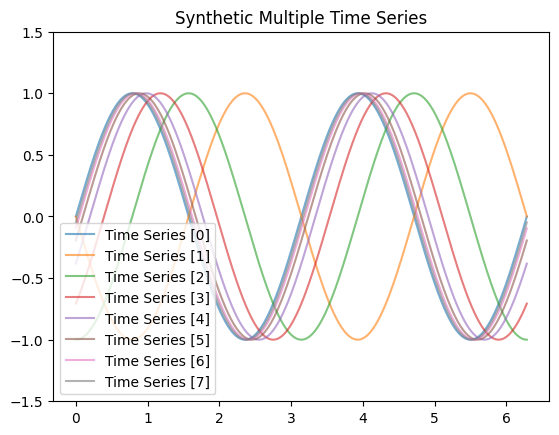

In [437]:
time_series_name = []
count = 0
for _ in time_series:
    time_series_name.append(str(count))
    count += 1
tmsg.plot_time_series(time_series=time_series, time_series_name=time_series_name)
plt.title("Synthetic Multiple Time Series")
plt.show()

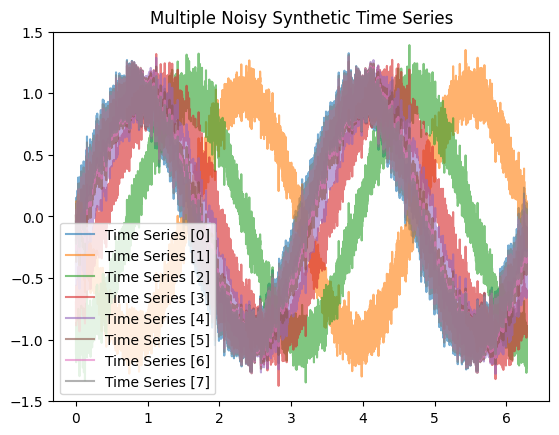

In [438]:
multiple_noisy_time_series = tmsg.generate_multiple_time_series_with_noise(time_series)
tmsg.plot_time_series(time_series= multiple_noisy_time_series, time_series_name=time_series_name)
plt.title("Multiple Noisy Synthetic Time Series")
plt.show()

### Add anomaly in STS

#### Diffences between anomaly insertion strategies 

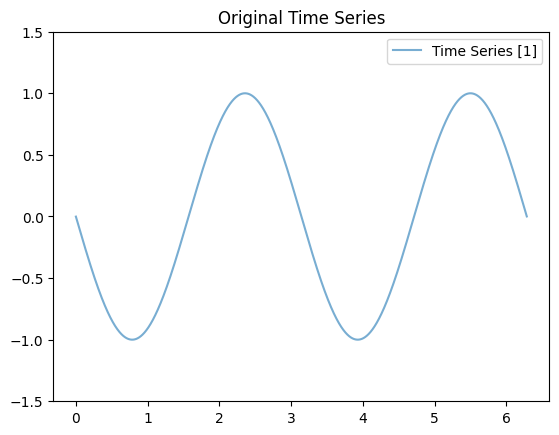

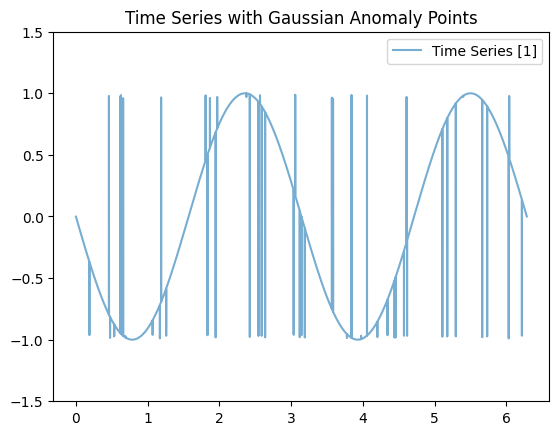

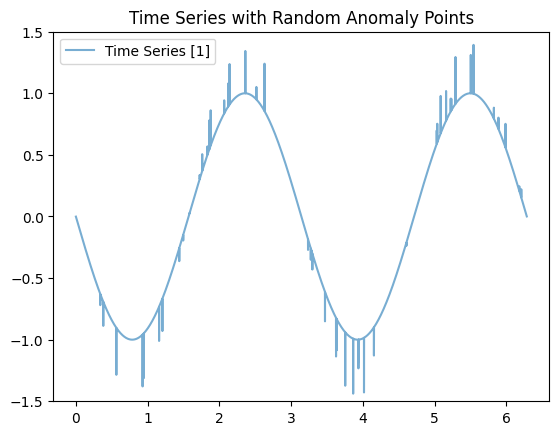

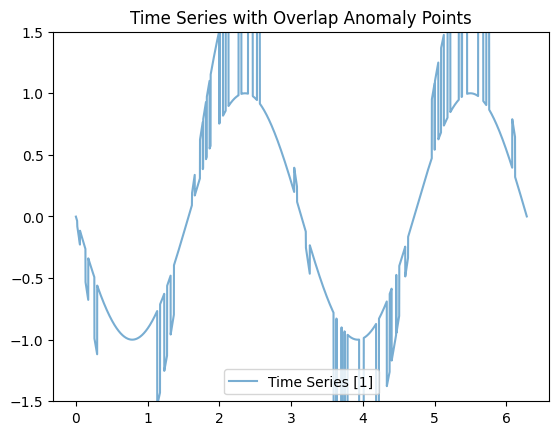

In [439]:
tmsg.plot_time_series([time_series[1]], time_series_name=['1'])
plt.title("Original Time Series")
plt.show()

time_series_1_gaussian_anomaly_points,gaussian_anomaly_labels = tmsg.put_gaussian_anomaly_points(time_series=time_series[1], amount=50)

tmsg.plot_time_series(time_series=[time_series_1_gaussian_anomaly_points], time_series_name=['1'])
plt.title("Time Series with Gaussian Anomaly Points")
plt.show()

time_series_1_random_anomaly_points,random_anomaly_labels = tmsg.put_anomaly_points(time_serie=time_series[1], amount=50)

tmsg.plot_time_series(time_series=[time_series_1_random_anomaly_points], time_series_name=['1'])
plt.title("Time Series with Random Anomaly Points")
plt.show()

ts1_anomaly_overlap = tmsg.generate_time_serie(size=len(time_series[1]), shift_number=shiftBySeries['ts1'], multiplicator= 2)
time_series_1_random_anomaly_points,overlap_anomaly_labels = tmsg.put_overlap_anomaly_points(time_serie=time_series[1], amount=50, seriesofAbnormalPoints=[ts1_anomaly_overlap, ts1_anomaly_overlap])

tmsg.plot_time_series(time_series=[time_series_1_random_anomaly_points], time_series_name=['1'])
plt.title("Time Series with Overlap Anomaly Points")
plt.show()

In [440]:
anomaly_gaussian_index, = np.where(gaussian_anomaly_labels == 1)
anomaly_random_index, = np.where(random_anomaly_labels == 1)
ts1 = time_series[1].reshape(time_series[1].shape[0],1)

print('\033[1m'+'\033[96m' + 'Are the Gaussian Anomaly Points in the original time series? ' +str(time_series_1_gaussian_anomaly_points[anomaly_gaussian_index] in ts1))
print('\033[91m' + 'Are the Random Anomaly Points in the original time series? ' +str(time_series_1_random_anomaly_points[anomaly_random_index] in ts1))

Are the Gaussian Anomaly Points in the original time series? True
Are the Random Anomaly Points in the original time series? True


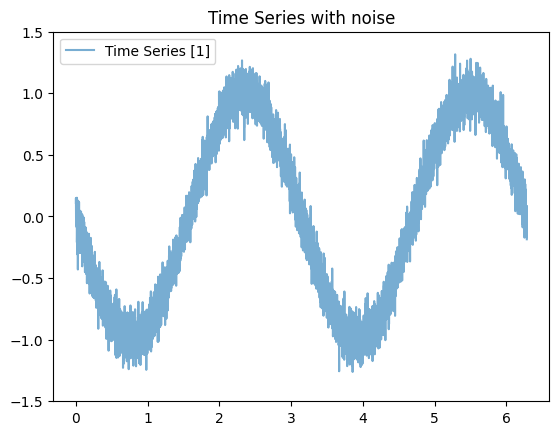

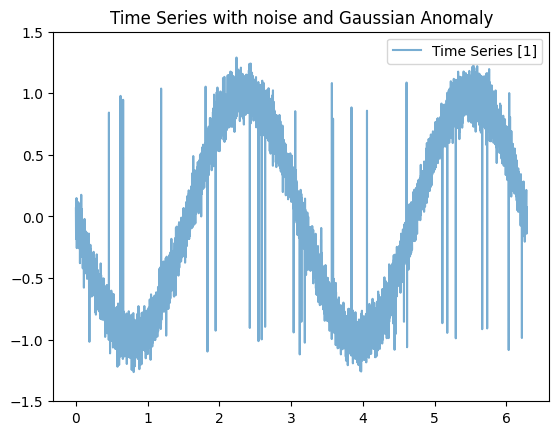

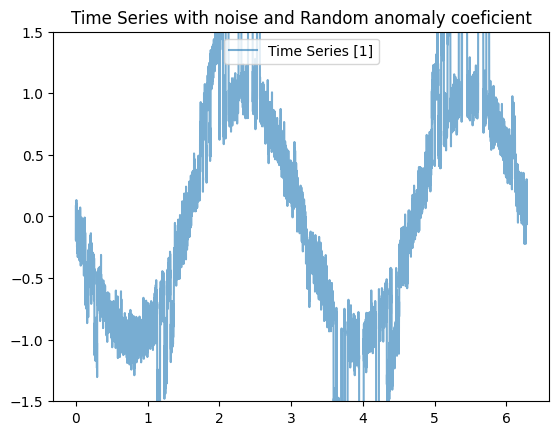

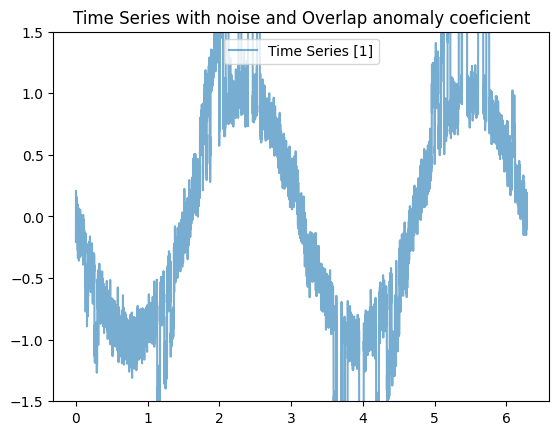

In [441]:
time_series_with_noise = tmsg.generate_multiple_time_series_with_noise([time_series[1]])
tmsg.plot_time_series(time_series=time_series_with_noise, time_series_name=['1'])
plt.title("Time Series with noise")
plt.show()

time_series_gaussian_with_noise = tmsg.generate_multiple_time_series_with_noise([time_series_1_gaussian_anomaly_points])
tmsg.plot_time_series(time_series=time_series_gaussian_with_noise, time_series_name=['1'])
plt.title("Time Series with noise and Gaussian Anomaly")
plt.show()

time_series_random_with_noise = tmsg.generate_multiple_time_series_with_noise([time_series_1_random_anomaly_points])
tmsg.plot_time_series(time_series=time_series_random_with_noise, time_series_name=['1'])
plt.title("Time Series with noise and Random anomaly coeficient")
plt.show()

time_series_overlap_with_noise = tmsg.generate_multiple_time_series_with_noise([time_series_1_random_anomaly_points])
tmsg.plot_time_series(time_series=time_series_overlap_with_noise, time_series_name=['1'])
plt.title("Time Series with noise and Overlap anomaly coeficient")
plt.show()

#### Add Gaussian Anomaly Points

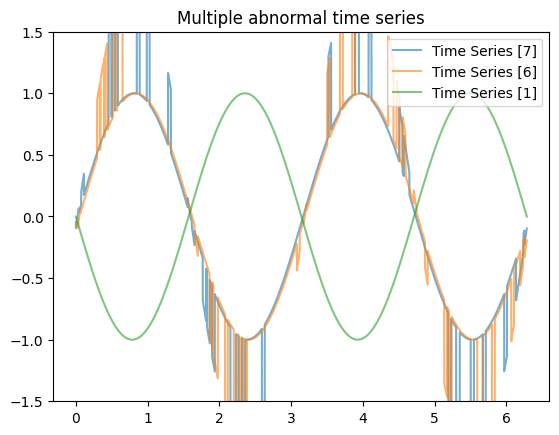

In [442]:
time_series_overlap_anomaly = time_series.copy()

ts7_anomaly_overlap = tmsg.generate_time_serie(size=len(time_series[7]), shift_number=shiftBySeries['ts7'], multiplicator= 2)
ts6_anomaly_overlap = tmsg.generate_time_serie(size=len(time_series[6]), shift_number=shiftBySeries['ts6'], multiplicator= 2)

time_series_overlap_anomaly[7],_ = tmsg.put_overlap_anomaly_points(time_serie=time_series_overlap_anomaly[7], amount=40, seriesofAbnormalPoints=[ts7_anomaly_overlap])
time_series_overlap_anomaly[6],_ = tmsg.put_overlap_anomaly_points(time_serie=time_series_overlap_anomaly[6], amount=40, seriesofAbnormalPoints=[ts6_anomaly_overlap])

tmsg.plot_time_series(time_series=[time_series_overlap_anomaly[7],time_series_overlap_anomaly[6], time_series_overlap_anomaly[1]],time_series_name=['7', '6', '1'])
plt.title("Multiple abnormal time series")
plt.show()

### Add noise in STS

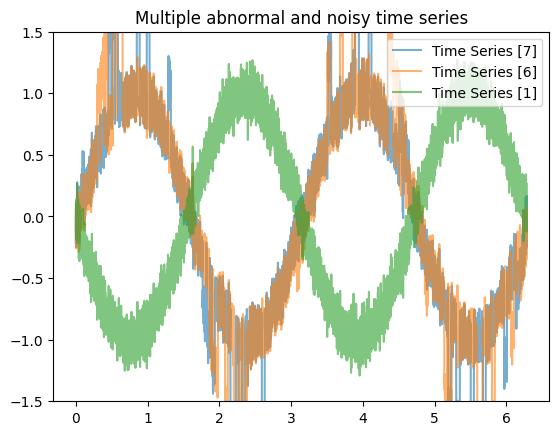

In [443]:
time_series_with_noise = tmsg.generate_multiple_time_series_with_noise(time_series_overlap_anomaly)
tmsg.plot_time_series(time_series=[time_series_with_noise[7], time_series_with_noise[6],time_series_with_noise[1]], time_series_name=['7', '6', '1'])
plt.title("Multiple abnormal and noisy time series")
plt.show()

### Calculate correlations confidence intervals between STS

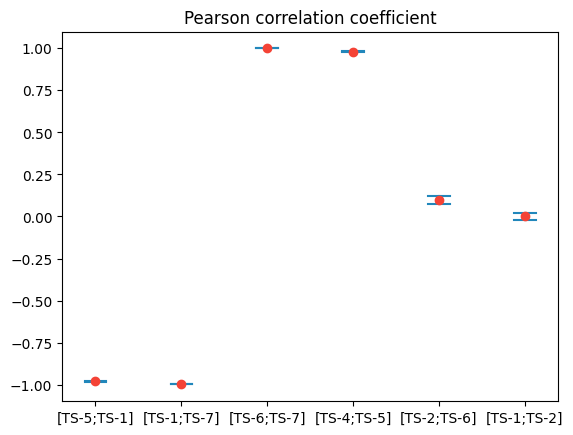

In [444]:
tmsg.plot_confidence_interval([[time_series[5],time_series[1]], [time_series[1],time_series[7]], [time_series[6],time_series[7]], [time_series[4],time_series[5]], [time_series[2],time_series[6]],[time_series[1],time_series[2]]], ['[TS-5;TS-1]', '[TS-1;TS-7]', '[TS-6;TS-7]', '[TS-4;TS-5]', '[TS-2;TS-6]','[TS-1;TS-2]'])

### Saving STS dataset to train and test

#### Generate data without anomaly to train

##### Dependent STS

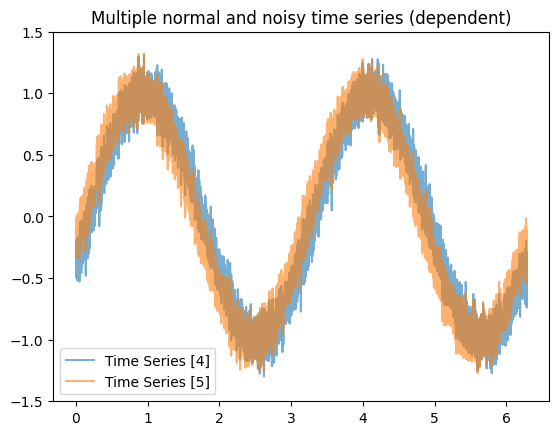

In [445]:
dependent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[4], time_series[5]])
tmsg.plot_time_series(time_series=dependent_time_series, time_series_name=['4', '5']) 
plt.title("Multiple normal and noisy time series (dependent)")
plt.show()

##### Independent STS

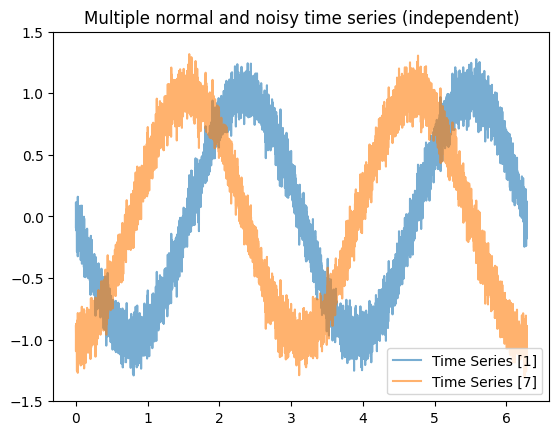

In [446]:
independent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[1], time_series[2]])
tmsg.plot_time_series(time_series=independent_time_series, time_series_name=['1', '7'])
plt.title("Multiple normal and noisy time series (independent)")
plt.show()

##### Saving MSTS datasets

In [447]:
tmsg.save(np.array(dependent_time_series).T, 'data/train/normal/sts_dependent_train.csv')
tmsg.save(np.array(independent_time_series).T, 'data/train/normal/sts_independent_train.csv')

#### Generate data with anomaly to test

##### Dependent STS

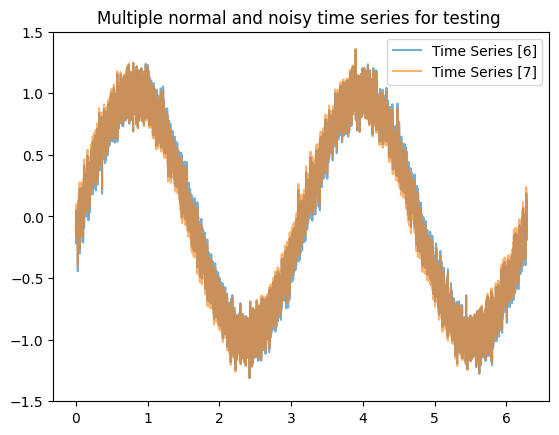

In [448]:
dependent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[6], time_series[7]])
tmsg.save(np.array(dependent_time_series).T, 'data/test/normal/sts_test.csv')
tmsg.plot_time_series(time_series=[dependent_time_series[0], dependent_time_series[1]], time_series_name=['6', '7'])
plt.title("Multiple normal and noisy time series for testing ")
plt.show()

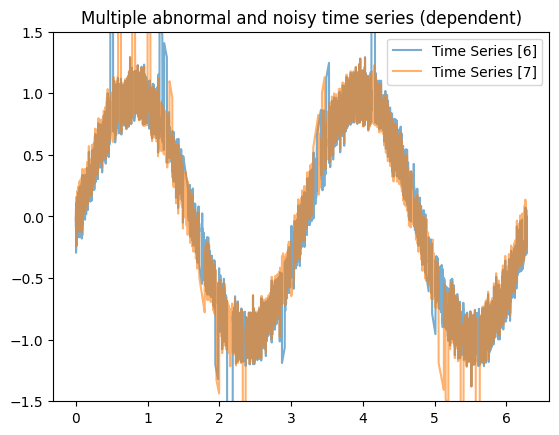

In [449]:
dependent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[6], time_series[7]])


ts0_anomaly_overlap = tmsg.generate_time_serie(size=len(time_series[6]), shift_number=shiftBySeries['ts6'], multiplicator= 2)
ts1_anomaly_overlap = tmsg.generate_time_serie(size=len(time_series[7]), shift_number=shiftBySeries['ts7'], multiplicator= 2)

dependent_time_series[0],test_labels_dependent_1 = tmsg.put_overlap_anomaly_points(time_serie=dependent_time_series[0], amount=20, seriesofAbnormalPoints=[ts0_anomaly_overlap])
dependent_time_series[1],test_labels_dependent_2 = tmsg.put_overlap_anomaly_points(time_serie=dependent_time_series[1], amount=20, seriesofAbnormalPoints=[ts1_anomaly_overlap])

#Union Labels
test_labels_dependent = test_labels_dependent_1.copy()
test_labels_dependent[test_labels_dependent_2 == 1] = 1

tmsg.plot_time_series(time_series=dependent_time_series, time_series_name=['6', '7'])
plt.title("Multiple abnormal and noisy time series (dependent)")
plt.show()

##### Independent STS

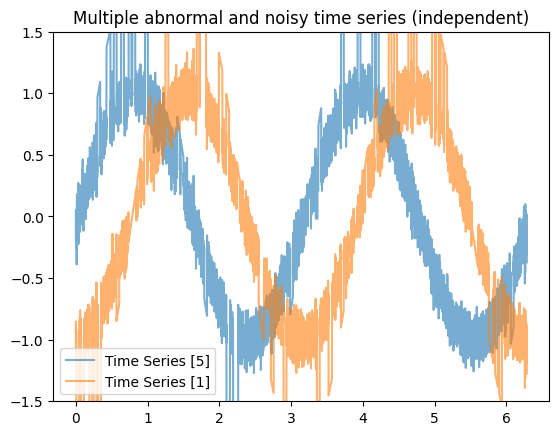

In [450]:
independent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[6], time_series[2]])

ts0_anomaly_overlap = tmsg.generate_time_serie(size=len(time_series[6]), shift_number=shiftBySeries['ts6'], multiplicator= 2)
ts1_anomaly_overlap = tmsg.generate_time_serie(size=len(time_series[2]), shift_number=shiftBySeries['ts2'], multiplicator= 2)

independent_time_series[0],test_labels_independent_1 = tmsg.put_overlap_anomaly_points(time_serie=independent_time_series[0], amount=25, seriesofAbnormalPoints=[ts0_anomaly_overlap])
independent_time_series[1],test_labels_independent_2 = tmsg.put_overlap_anomaly_points(time_serie=independent_time_series[1], amount=50, seriesofAbnormalPoints=[ts1_anomaly_overlap])

#Union Labels
test_labels_independent = test_labels_independent_1.copy()
test_labels_independent[test_labels_independent_2 == 1] = 1

tmsg.plot_time_series(time_series=independent_time_series, time_series_name=['5', '1'])
plt.title("Multiple abnormal and noisy time series (independent)")
plt.show()

##### Save STS datasets to test

In [451]:
tmsg.save(np.array(dependent_time_series).T, 'data/test/abnormal/sts_dependent_test.csv')
tmsg.save(np.array(test_labels_dependent).reshape(-1,1), 'data/test/abnormal/sts_dependent_test_labels.csv')
tmsg.save(np.array(independent_time_series).T, 'data/test/abnormal/sts_independent_test.csv') 
tmsg.save(np.array(test_labels_independent).reshape(-1,1), 'data/test/abnormal/sts_independent_test_labels.csv')